### GRIP : The Spark Foundation (Data Science & Business Analytics Intern)

### Name : Rohan Patil

#### Task 1: Prediction of the Percentage of a Student's Based on the No. of Study Hour's using Supervised Machine Learning (ML) 

#### Supervised Machine Learning is a type of Machine Learning in which the machine is fed the training data which is labeled. Supervised Machine Learning is further categorized into Regression and Classification.

#### Linear regression is a basic and commonly used type of predictive analysis.  The overall idea of regression is to examine two things: (1) does a set of predictor variables do a good job in predicting an outcome (dependent) variable?  (2) Which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable?  These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables.

#### In this task, we have to predict the percentage score of a student based on the number of hours studied. The task has two variables, where the feature is no of hours studied and the target variable is the percentage scored. This can be solved using Supervised Linear Regression.

### Importing required libraries

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics

### Importing dataset from the url

In [3]:
data = pd.read_csv('http://bit.ly/w-data')

### Shape of the given dataset

In [5]:
data.shape

(25, 2)

### Columns of dataset

In [18]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

### Some statistical details of dataset

In [19]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### First 5 rows of dataset

In [7]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Last 5 rows of dataset

In [6]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### Check for null values

In [20]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

#### There are no null values, which means we can go ahead with further analysis

### Correlation between variables

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


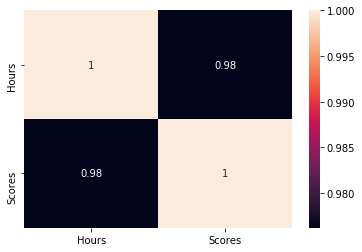

In [14]:
print(data.corr())
sns.heatmap(data.corr(),annot=True)

#### From the above scatter diagram and heatmap, we can clearly see hours and scores variables are strongly positively correlated

### Scatter plot of Hours vs Scores

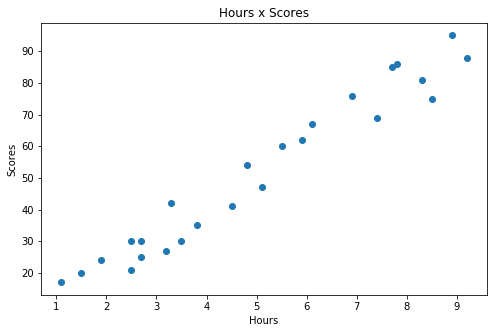

In [26]:
plt.figure(figsize=(8,5))
plt.scatter(data['Hours'],data['Scores'])
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours x Scores")
plt.show()

### Dividing dataset into feature variable & target variable

In [38]:
x=data['Hours'].values
y=data['Scores'].values

### Spiltting dataset into training & testing dataset into 80:20 ratio

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### Reshaping x_train and x_test

In [61]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

### Printing shapes

In [48]:
print('Shape of x_train => ',x_train.shape)
print('Shape of x_test => ',x_test.shape)
print('Shape of y_train => ',y_train.shape)
print('Shape of y_test => ',y_test.shape)

Shape of x_train =>  (20, 1)
Shape of x_test =>  (5, 1)
Shape of y_train =>  (20,)
Shape of y_test =>  (5,)


## Fitting models

## 1. Linear regression

In [104]:
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Linear regression equation

In [105]:
coef=np.round(linear_reg.coef_[0],2)
inter=np.round(linear_reg.intercept_,2)
print("Scores = {} x Hours + {}".format(coef,inter))

Scores = 9.91 x Hours + 2.02


In [106]:
prediction = linear_reg.predict(x_test)
print('Mean absolute error => ',metrics.mean_absolute_error(y_test,prediction))
print('Mean squared error => ',metrics.mean_squared_error(y_test,prediction))
print('Root Mean squared error => ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
lr_accuracy=metrics.r2_score(y_test,prediction)
print('R2 Score = ',metrics.r2_score(y_test,prediction))

Mean absolute error =>  4.183859899002975
Mean squared error =>  21.5987693072174
Root Mean squared error =>  4.6474476121003665
R2 Score =  0.9454906892105356


### What will be predicted score if a student studies for 9.25 hrs/ day?

In [96]:
hr=float(input("Enter no. of hours => "))
score=linear_reg.predict([[hr]])[0]
print("If a student studies for {} hrs/day, he/she will score {}.".format(hr,np.round(score,2)))

Enter no. of hours => 9.25
If a student studies for 9.25 hrs/day, he/she will score 93.69.


## 2. Ridge Regression

In [107]:
ridge = Ridge()
ridge.fit(x_train,y_train)
prediction = ridge.predict(x_test)
print('Mean absolute error => ',metrics.mean_absolute_error(y_test,prediction))
print('Mean squared error => ',metrics.mean_squared_error(y_test,prediction))
print('Root Mean squared error => ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
ridge_accuracy=metrics.r2_score(y_test,prediction)
print('R2 Score = ',metrics.r2_score(y_test,prediction))

Mean absolute error =>  4.089342367221116
Mean squared error =>  21.01914402727752
Root Mean squared error =>  4.584664003749623
R2 Score =  0.9469535028586777


## 3. Lasso Regression

In [108]:
lasso = Lasso()
lasso.fit(x_train,y_train)
prediction = lasso.predict(x_test)
print('Mean absolute error => ',metrics.mean_absolute_error(y_test,prediction))
print('Mean squared error => ',metrics.mean_squared_error(y_test,prediction))
print('Root Mean squared error => ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
lasso_accuracy=metrics.r2_score(y_test,prediction)
print('R2 Score = ',metrics.r2_score(y_test,prediction))

Mean absolute error =>  3.9915771073417075
Mean squared error =>  20.50153919825004
Root Mean squared error =>  4.527862541889942
R2 Score =  0.9482597940686199


### Table of Algorithms and there accuracy

In [111]:
pd.DataFrame({'Algorithms':['Linear Regression','Ridge Regression','Lasso Regression'],
              'Accuracy':[lr_accuracy,ridge_accuracy,lasso_accuracy]})

,Algorithms,Accuracy
0,Linear Regression,0.945491
1,Ridge Regression,0.946954
2,Lasso Regression,0.948260


#### As we can clearly see, Lasso & Ridge regression has slightly better accuracy than Linear regression